# 02b - Torus Segmentation Demo

This notebook demonstrates mesh segmentation using a torus geometry. The torus has genus = 1 (one hole), which creates multiple segments in middle slices.

 - [Return to Index](01_tutorial_index.ipynb)

In [5]:
from discos import create_torus_mesh, MeshSegmenter, MeshManager
import trimesh
import numpy as np
import matplotlib.pyplot as plt

## Create and Visualize Torus

In [7]:
# Create a torus mesh
torus = create_torus_mesh(major_radius=3.0, minor_radius=1.0, major_segments=24, minor_segments=12)

# Rotate so the torus lies on its side (ensures slices through the hole)
torus.apply_transform(trimesh.transformations.rotation_matrix(
    angle=np.pi / 2,
    direction=[1, 0, 0],
    point=torus.centroid
))

print(f"Torus properties:")
print(f"  Volume: {torus.volume:.3f}")
print(f"  Surface area: {torus.area:.3f}")
print(f"  Z-bounds: {torus.bounds[:, 2]}")

torus = MeshManager(torus)

# Visualize the original torus
fig = torus.visualize_mesh_3d(title="Original Torus", backend="plotly")
fig.show()

Torus properties:
  Volume: 58.461
  Surface area: 117.771
  Z-bounds: [-4.  4.]


## Segment the Mesh

In [8]:
# Create segmenter and segment the mesh
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(torus.mesh, slice_height=0.8, min_volume=0.1)

print(f"Segmentation complete!")
print(f"Total segments: {len(segments)}")
print(f"Total slices: {len(segmenter.slices)}")

✅ Validated single-hull mesh: 2048 external faces, volume=58.461
Computing 9 cross-sections from z=-4.00 to z=4.00
  Cross-section 0: z=-3.20, 70 line segments, area=0.000
  Cross-section 1: z=-2.40, 114 line segments, area=0.000
  Cross-section 2: z=-1.60, 136 line segments, area=0.000
  Cross-section 3: z=-0.80, 132 line segments, area=0.000
  Cross-section 4: z=-0.00, 64 line segments, area=0.000
  Cross-section 5: z=0.80, 132 line segments, area=0.000
  Cross-section 6: z=1.60, 136 line segments, area=0.000
  Cross-section 7: z=2.40, 114 line segments, area=0.000
  Cross-section 8: z=3.20, 70 line segments, area=0.000
✅ Computed 9 cross-sections, creating 10 slices

Processing slice 0: z=[-4.00, -3.20]
  🏷️  Annotated 210 external + 68 internal faces
  Slice 0: 1 closed volumes (segments)
    🔄 Transferred face attributes: 278 faces
    Segment seg_0_0: vol=3.309, ext_area=10.329, int_area=7.699

Processing slice 1: z=[-3.20, -2.40]
  🏷️  Annotated 368 external + 180 internal faces

## SegmentGraph

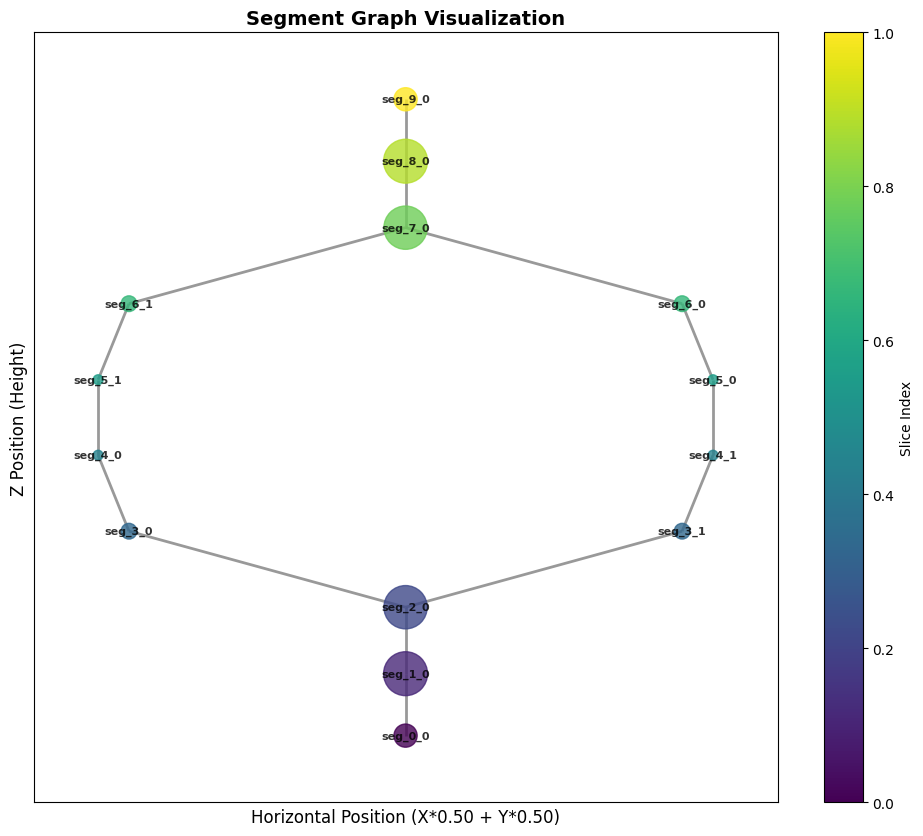

In [10]:
graph = segmenter.get_segment_graph()
_ = graph.visualize(repulsion_strength=0.0)

## Summary

The torus segmentation demonstrates:
- **Complex topology**: Middle slices contain multiple segments due to the hole
- **Ring connectivity**: Segments form a circular arrangement in 3D space
- **Genus = 1 handling**: Algorithm correctly identifies separate connected components within slices
- **Spatial relationships**: 3D visualization reveals the donut structure

This showcases the algorithm's ability to handle complex topologies with holes.